In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ad=pd.read_csv('adult (1).csv',na_values=['?'])

In [10]:
ad

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [11]:
ad.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
ad.fillna(method='ffill',inplace=True)

In [14]:
ad.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder


In [59]:
le=LabelEncoder()
#data=ad.columns[ad.dtypes=='object']
data=['gender','income']
for i in data:
    ad[i]=le.fit_transform(ad[i])

In [60]:
ad.head()
type(ad)

pandas.core.frame.DataFrame

In [61]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null int32
fnlwgt             48842 non-null int64
education          48842 non-null int32
educational-num    48842 non-null int64
marital-status     48842 non-null int32
occupation         48842 non-null int32
relationship       48842 non-null int32
race               48842 non-null int32
gender             48842 non-null int64
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null int32
income             48842 non-null int64
dtypes: int32(7), int64(8)
memory usage: 4.3 MB


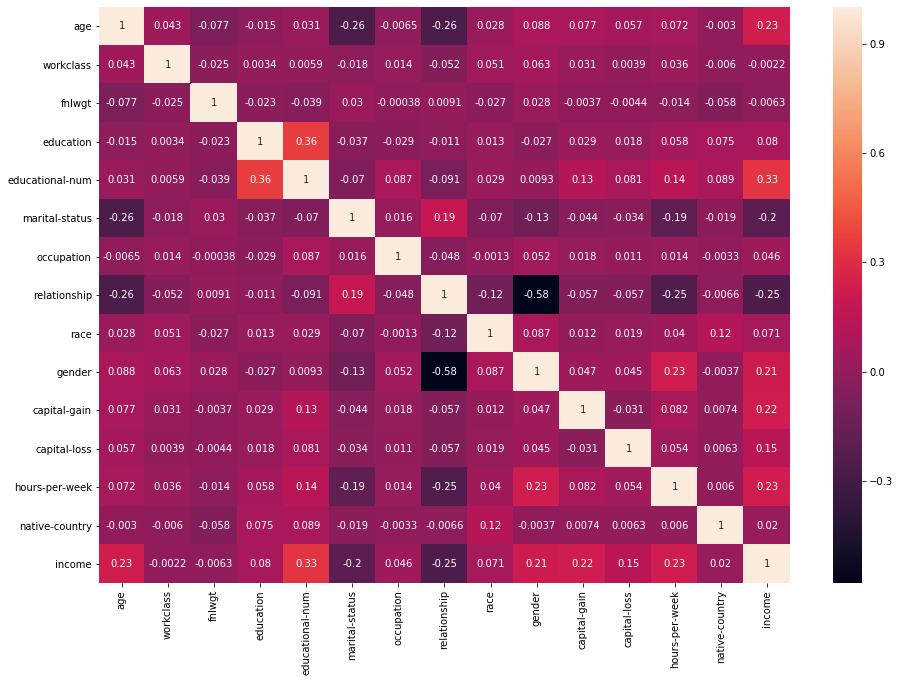

In [45]:
fig=plt.figure()
sns.heatmap(ad.corr(),annot=True,ax=fig.add_axes([2,2,2,2]))

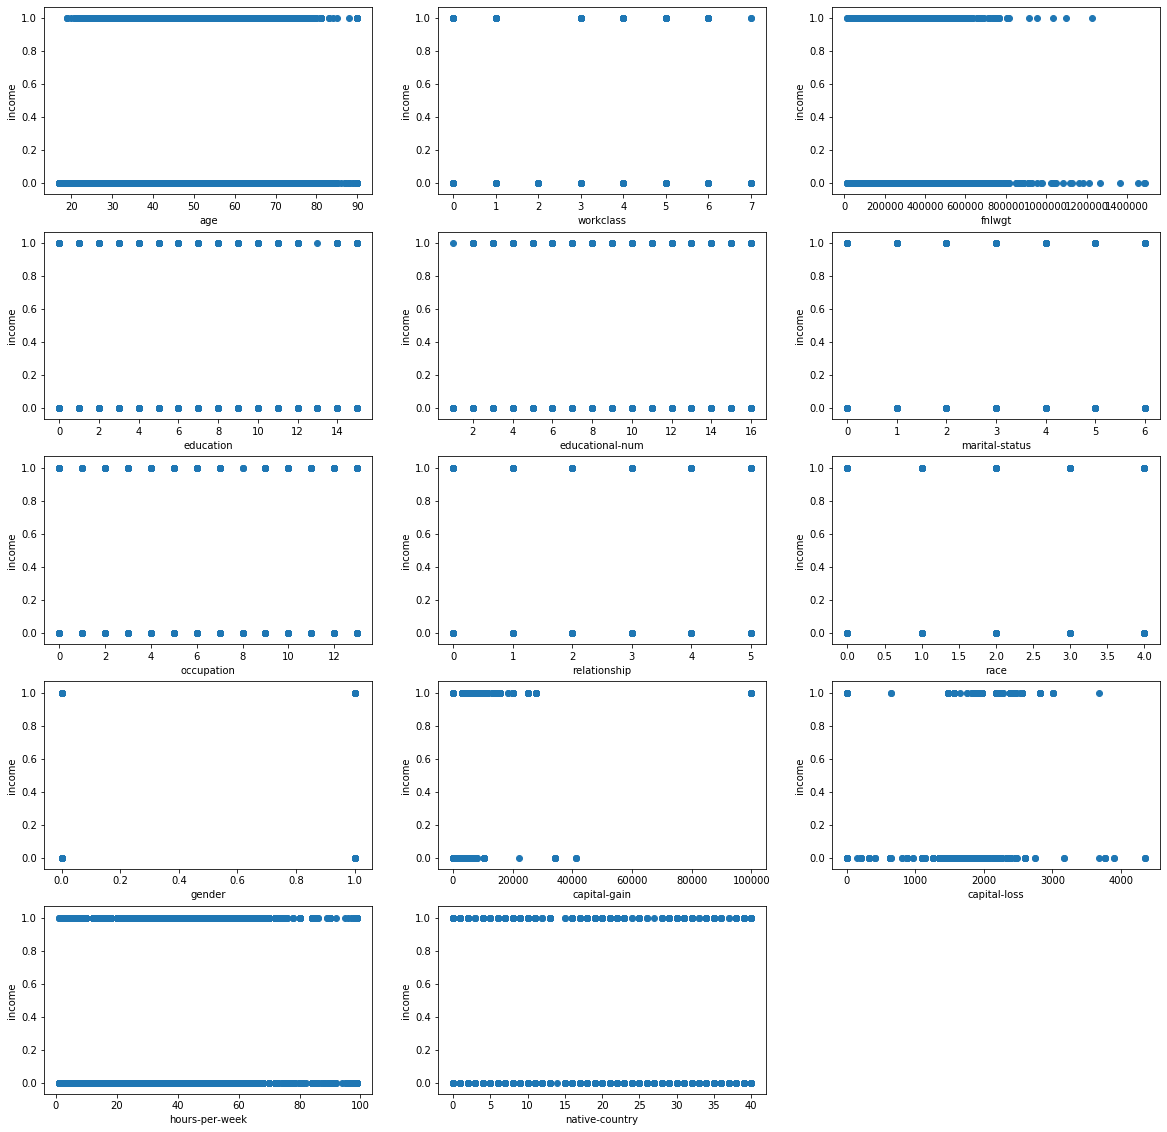

In [58]:
a=list(ad.columns)
a.remove('income')
b=1
plt.figure(figsize=(20,20))
for i in a:
    plt.subplot(5,3,b)
    plt.xlabel(i)
    plt.ylabel('income')
    plt.scatter(ad[i],ad['income'])
    b+=1